# MPA 5830 - Module 06 (Fall 2021)

In the last module we started building some visualizations in order to answer specific substantive questions. In this module we will look at generating more advanced graphics that have annotations, combine several graphics into one, build some interactive graphics, and also do some mapping. 

# Combining Plots with `{patchwork}`
Often you have to combine and place multiple graphics into a single canvas. There are a few ways to do this but the easiest way is that offered by the `{patchwork}` package. Let us use the `diamonds` data for this section, a data frame with 53940 rows and 10 variables:

| Variable | Description |
| :-- | :-- |
| price |  price in US dollars (\$326--\$18,823) |
| carat | weight of the diamond (0.2--5.01) |
| cut | quality of the cut (Fair, Good, Very Good, Premium, Ideal) |
| color | diamond colour, from D (best) to J (worst) |
| clarity | a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) |
| x | length in mm (0--10.74) |
| y | width in mm (0--58.9) |
| z | depth in mm (0--31.8) |
| depth | total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) |
| table | width of top of diamond relative to widest point (43--95) |

## The Basics 

To combine multiple plots, we need to save `each plot` with a unique name. I am calling them `p1`, `p2`, etc. Let us generate four plots, each different from all others. 

In [1]:
install.packages(c('patchwork', 'tidylog'))

Installing packages into ‘/Users/ruhil/Library/R/arm64/4.3/library’
(as ‘lib’ is unspecified)




The downloaded binary packages are in
	/var/folders/qh/6q39v0755_54rxmbl8m5ttnwy0twd7/T//RtmpIybWhh/downloaded_packages


In [2]:
library(patchwork)
library(tidyverse)
library(tidylog)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘tidylog’


The following objects are masked from ‘package:dplyr’:

    add_count, add_tally, anti_join, count, distinct, distinct_all,
    distinct_at, distinct_if, filter, filter_all, filter_at, filter_if,
    full_join, group_by, group_by_all, group_by_at, group_by_if,
    inner_join, left_join, mutate, mutate_all, mutate_at, mutate_if,
    relocate, rename, rename_all, rename_at, rename_if, rename_with,
    right_join, sample_frac, sample_n, select

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 8)

ggplot() +
  geom_bar(data = diamonds,
           aes(x = cut, fill = cut)
           ) +
  labs(x = "Cut of the Diamond", y = "Frequency") +
  theme(legend.position = "none") -> p1

In [ ]:
ggplot() +
  geom_bar(data = diamonds,
           aes(x = color, fill = color)
           ) +
  labs(x = "Color of the Diamond", y = "Frequency") +
  theme(legend.position = "none") -> p2

In [ ]:
ggplot() +
  geom_point(data = diamonds,
           aes(x = carat, y = price, color = cut)
           ) +
  labs(x = "Weight of the Diamond", y = "Price of the Diamond", color = "") +
  theme(legend.position = "bottom") -> p3

In [ ]:
ggplot() +
  geom_boxplot(data = diamonds,
           aes(x = price, y = clarity, fill = cut)
           ) +
  labs(y = "Clarity of the Diamond", x = "Price of the Diamond", fill = "") +
  theme(legend.position = "bottom") -> p4

Let us see each plot in turn so we know what they look like.

In [ ]:
p1; p2; p3; p4

Now we combine p1 through p3 on a single canvas

In [ ]:
p1 + p2 + p3 

Notice the default layout here: `p1 + p2 + p3` gives us the plots all in a row. 

But you may have other plans, for example, to put the scatterplot in a row all its own. 

In [ ]:
(p1 + p2) / p3

Now we have `p3` in the second row, all by itself. Note that this was achieved via the `/` operator and by coercing `p1` and `p2` into a single row via `(p1 + p2)`. 

What if we used `|` instead?

In [ ]:
p1 | (p2 + p3)

You ended up with two columns, the first containing only `p1` and the second containing `p2` and `p3`. 

Note the difference between `|` and `/`. For example, note the following setup:

In [ ]:
p1 | (p2 / p3)

You get `p1` in one-half of the canvas, and then `p2` and `p3` are split into two rows in the remaining half of the canvas.

What if we wanted to squeeze in the fourth plot?

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 16)

(p1 + p2) / (p3 + p4)

Here you asked for `p1` and `p2` to be kept together, which led to both occupying the first row of the canvas. Then `p3` and `p4` were slotted into the second row. 

## Annotations 
Annotations become helpful because you can add omnibus titles and tags for individual plots. For example, you can generate a common title, subtitle, caption, etc as shown below). 

In [ ]:
(p1 + p2) / (p3 + p4) +
  plot_annotation(
  title = 'The surprising truth about diamonds',
  subtitle = 'These plots will reveal untold secrets about one of our beloved data-sets',
  caption = 'Disclaimer: None of these plots are insightful',
  tag_levels = c('a', '1'),
  tag_prefix = 'Fig. ',
  tag_sep = '.',
  tag_suffix = ':'
  ) &
  theme(
    plot.tag.position = c(0, 1),
    plot.tag = element_text(size = 9, hjust = 0, vjust = 0, color = "steelblue")
    )

## Spacing and Sizing
We can also tweak the sizes of individual rows and columns, control the space between plots, and so on. First up, spacing the plots with `plot_spacer()` 

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 8)

(p1 + plot_spacer() + p2 + plot_spacer() + p3)

Sizing the plots with relative sizes?

In [ ]:
options(repr.plot.width = 16, repr.plot.height = 16)

p1 + p2 + p3 + p4 + 
  plot_layout(widths = c(2, 1))

Alternatively, we could specify size with unit vectors, as shown below. 

In [ ]:
p1 + p2 + p3 + p4 + 
  plot_layout(
    widths = c(2, 1),
    heights = unit(c(5, 1), c('cm', 'null'))
    )

## Moving Beyond the grid

We can use a `layout` design to get a little more flexibility but still retain full control over the result. Layout designs can be done in two ways so let us see the easiest route -- as a text setup. "When using the textual representation it is your responsibility to make sure that each area is rectangular. The only exception is # which denotes empty areas and can thus be of any shape."

In [ ]:
layout <- "
##BBBB
AACCDD
##CCDD
"
p2 + p3 + p4 + p1 + 
  plot_layout(design = layout)

The other path is using `area()` inside `layout`, as shown below. 

In [ ]:
layout <- c(
  area(t = 2, l = 1, b = 5, r = 4),
  area(t = 1, l = 3, b = 3, r = 5)
  )

p3 + p4 + 
  plot_layout(design = layout)

Watch the specification here with `wrap_plots()`

In [ ]:
layout <- '
A##
#B#
##C
'
wrap_plots(A = p1, B = p2, C = p3, design = layout)

## Fixed-aspect plots 

There are some plots that use fixed coordinates and these should not be disturbed. Here is an example where the map has fixed coordinates specified via `geom_sf().` What does htis mean? In plain words, this means we should neither stretch nor shrink the map horizontally or vertically because that would distort how it would appear. 

Let us start by creating a file that has coordinates of all states except Alaska and Hawaii.  

In [3]:
load("data/states.RData")

head(states)

GEOID,NAME,variable,estimate,moe
<chr>,<chr>,<chr>,<dbl>,<dbl>
01,Alabama,B01001_001,4876250,NA
02,Alaska,B01001_001,737068,NA
04,Arizona,B01001_001,7050299,NA
05,Arkansas,B01001_001,2999370,NA
06,California,B01001_001,39283497,NA
08,Colorado,B01001_001,5610349,NA


In [8]:
install.packages(c("maptools", "maps"))

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [9]:
map_data("state") -> states_df

In [10]:
head(states_df)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-87.46201,30.38968,1,1,alabama,NA
2,-87.48493,30.37249,1,2,alabama,NA
3,-87.52503,30.37249,1,3,alabama,NA
4,-87.53076,30.33239,1,4,alabama,NA
5,-87.57087,30.32665,1,5,alabama,NA
6,-87.58806,30.32665,1,6,alabama,NA


In [11]:
install.packages("ggthemes")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



Now we build a simple map. The borders will be all in white, and the fill color will be black. 

In [12]:
states_df %>%
    ggplot() +
    geom_polygon(
        aes(
        x = long, y = lat, group = group),
        color = "white"
        ) +
    coord_fixed(1.3) +
    ggthemes::theme_map() + 
    theme(
        legend.position = "bottom",
        legend.key.width = unit(2, 'cm')
        ) +
    labs(
        title = "Fixed Scale Map!!"
        ) -> mymap

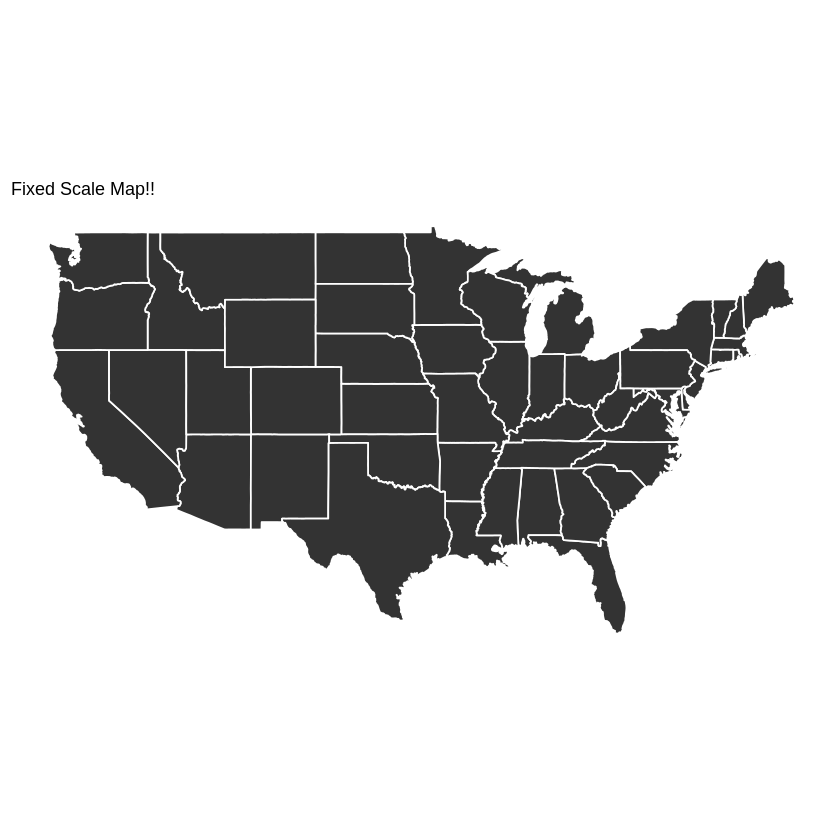

In [13]:
mymap

In [ ]:
mymap + p1 + p2 + p3

Note that in the next section we will go over the various elements that go into the map. 

# Mapping 

Maps are very powerful visualizations because they allow you to highlight and reflect patterns, clusters, with relative ease. For example, is poverty really higher in Appalachian counties? What about the percent of the population without health insurance? Literacy? Opioid deaths; do they follow transportation routes? What about COVID-19 cases? Maps to the rescue!

Building a map requires a few elements. First and foremost, you need some data to show on a map. Second, you need to have the geographic coordinates needed to build a map, basically the latitude and longitude of the geographies (states, cities, school districts, etc.) that you want to map. Third, you want a column that contains the names of the geographies you want to map, and these should be properly formatted (i.e., in titlecase) for displaying on the map. 

Let us start by building a simple state map. One can build a map in a number of ways in R but we will rely on a simple approach that involves loading up a built-in data-frame that has the state boundaries of the 48 Continental states, or then another built-in data-frame the counties in these 48 states. 

In [14]:
map_data("state") -> states_df

In [15]:
map_data("county") -> counties_df

In [16]:
head(states_df)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-87.46201,30.38968,1,1,alabama,NA
2,-87.48493,30.37249,1,2,alabama,NA
3,-87.52503,30.37249,1,3,alabama,NA
4,-87.53076,30.33239,1,4,alabama,NA
5,-87.57087,30.32665,1,5,alabama,NA
6,-87.58806,30.32665,1,6,alabama,NA


In [17]:
head(counties_df)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-86.50517,32.34920,1,1,alabama,autauga
2,-86.53382,32.35493,1,2,alabama,autauga
3,-86.54527,32.36639,1,3,alabama,autauga
4,-86.55673,32.37785,1,4,alabama,autauga
5,-86.57966,32.38357,1,5,alabama,autauga
6,-86.59111,32.37785,1,6,alabama,autauga


First, a state map. This is built very simply as shown below. 

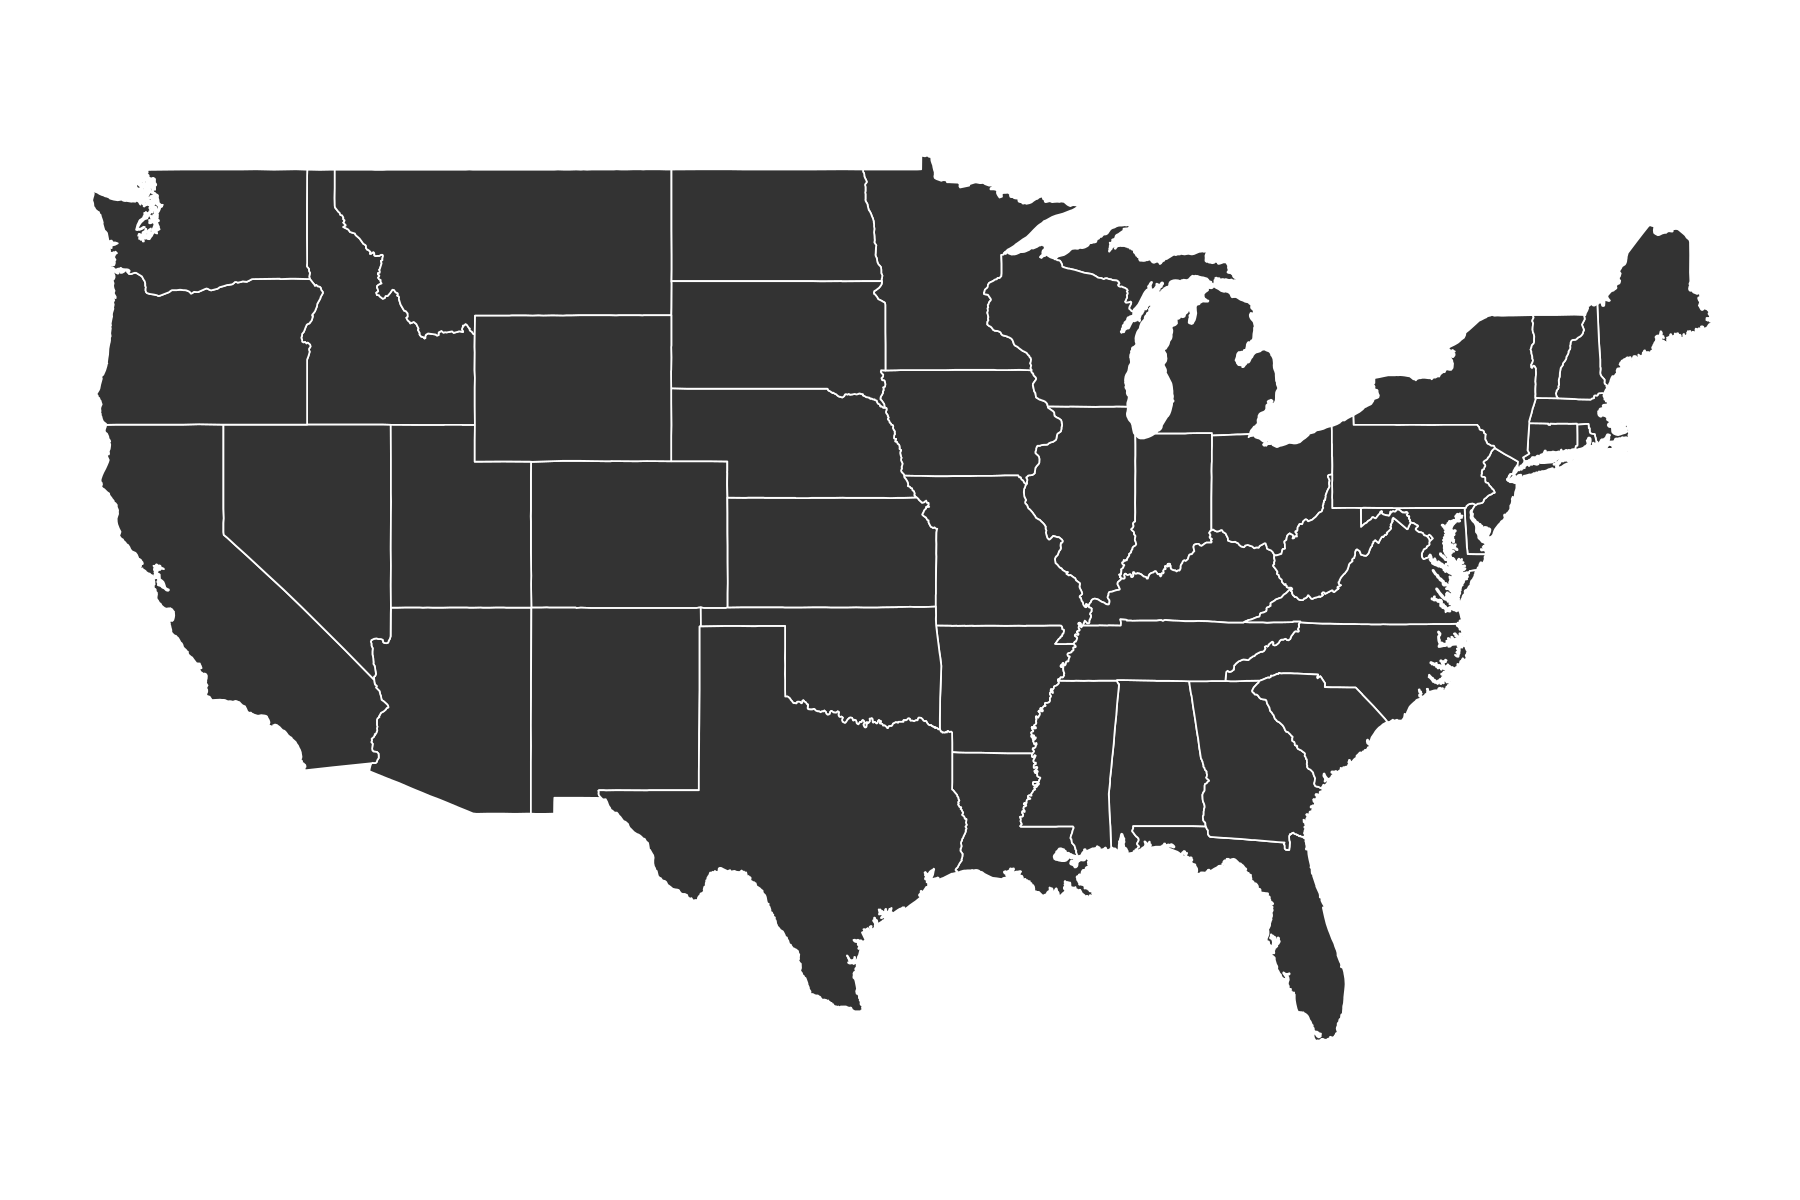

In [18]:
options(repr.plot.width = 15, repr.plot.height = 10)

states_df %>%
    ggplot() + 
    geom_polygon(
        aes(
        x = long, y = lat, group = group),
        color = "white"
        ) +
    coord_fixed(1.3) +
    ggthemes::theme_map() 

And now a county map.

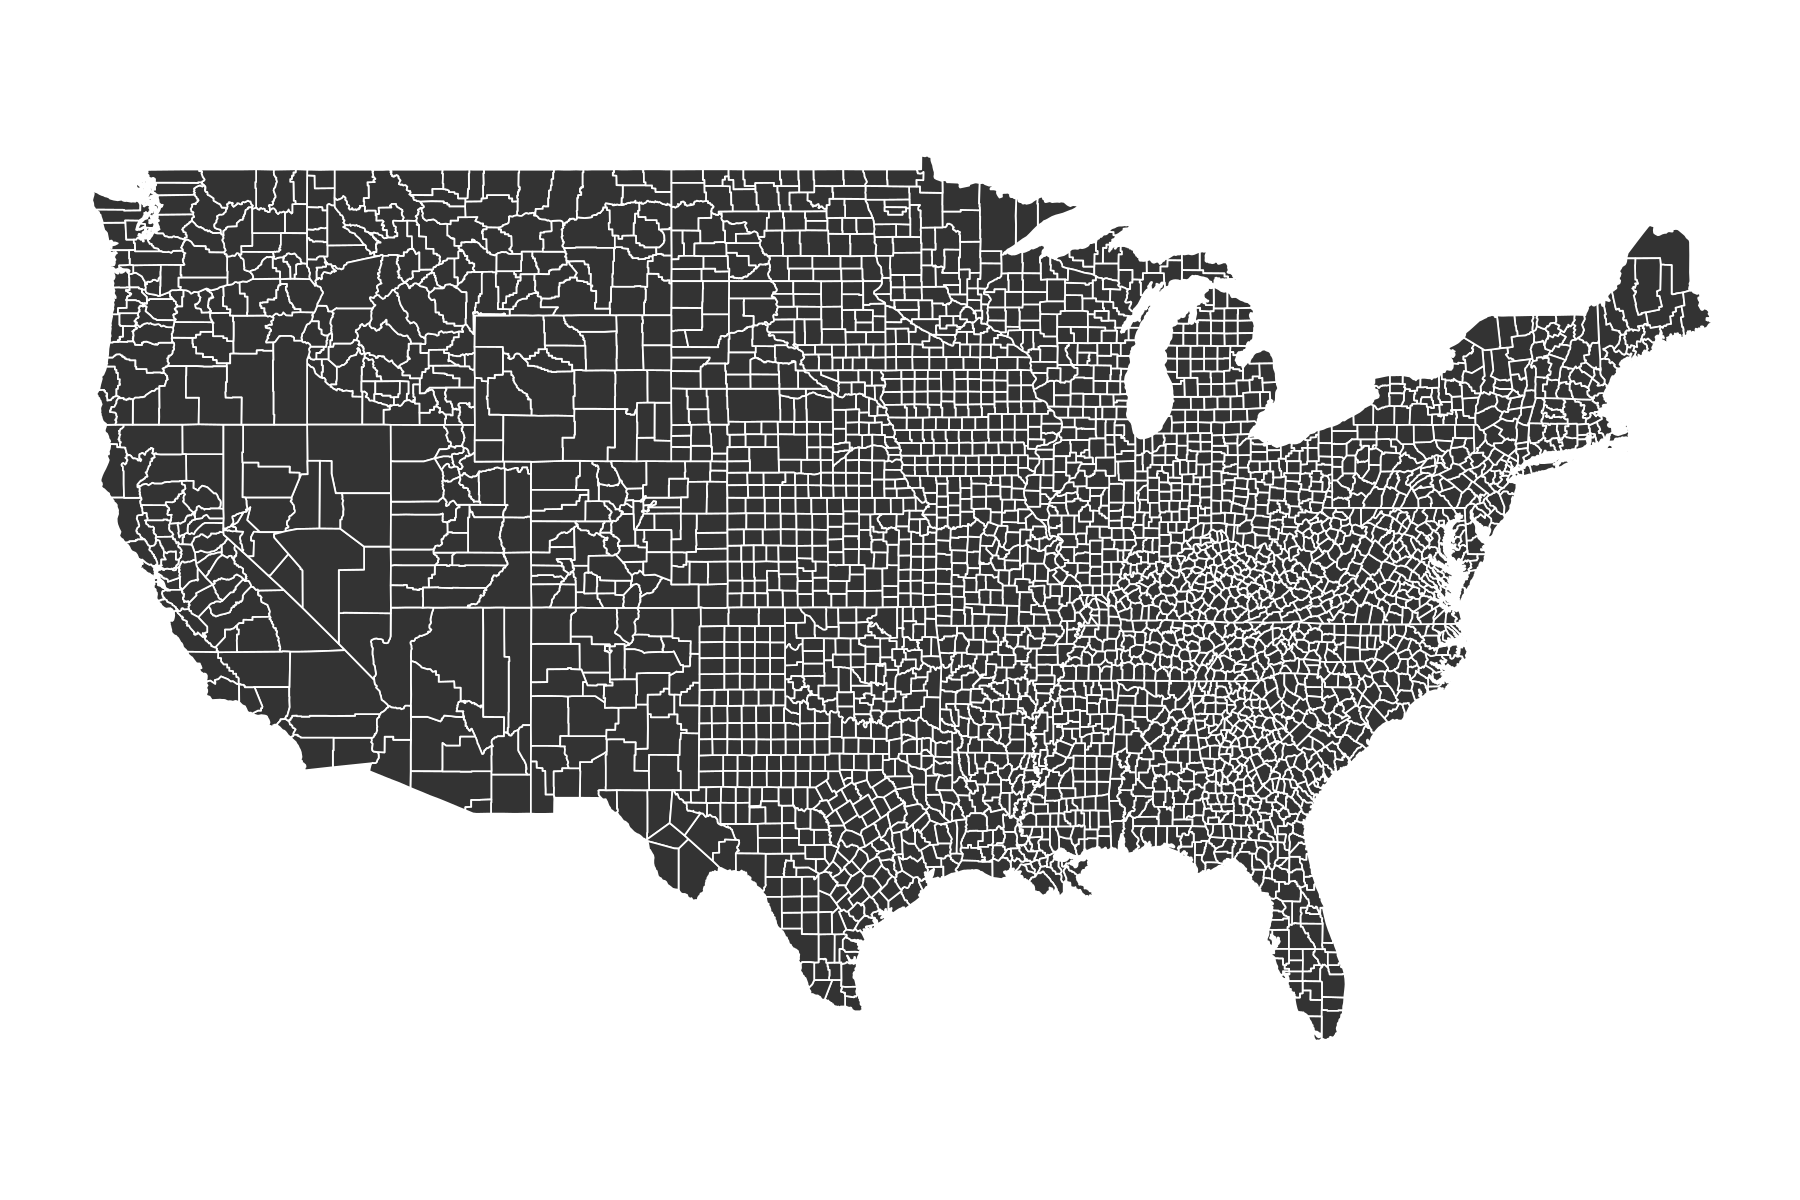

In [19]:
counties_df %>%
    ggplot() + 
    geom_polygon(
        aes(
        x = long, y = lat, group = group),
        color = "white"
        ) +
    coord_fixed(1.3) +
    ggthemes::theme_map() 

These are simple maps in that the states and counties have not been filled with any color resembling some attribute -- the population size of states\counties, their unemployment rates, number of COVID-19 cases diagnosed, and so on. Well, to do this we would need information on population size, unemployment rates, COVID-19 cases, and so on. 

Luckily for us, the column `estimate` in the `states.RData` file includes population size. So this should be easy. What we will need to do, however, is to join the `states.RData` with our `states_df` file.

In [20]:
load("data/states.RData")

head(states)

GEOID,NAME,variable,estimate,moe
<chr>,<chr>,<chr>,<dbl>,<dbl>
01,Alabama,B01001_001,4876250,NA
02,Alaska,B01001_001,737068,NA
04,Arizona,B01001_001,7050299,NA
05,Arkansas,B01001_001,2999370,NA
06,California,B01001_001,39283497,NA
08,Colorado,B01001_001,5610349,NA


Hmm, now we have a problem. In brief, here the `NAME` column is in titlecase but our `states_df` file has it all lowercase. Well, let us fix that since we will need the state names to be identical before we can join the files.

In [22]:
states_df %>%
    mutate(
        NAME = stringr::str_to_title(region)
        ) -> states_df

head(states_df)

,long,lat,group,order,region,subregion,NAME
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>
1,-87.46201,30.38968,1,1,alabama,NA,Alabama
2,-87.48493,30.37249,1,2,alabama,NA,Alabama
3,-87.52503,30.37249,1,3,alabama,NA,Alabama
4,-87.53076,30.33239,1,4,alabama,NA,Alabama
5,-87.57087,30.32665,1,5,alabama,NA,Alabama
6,-87.58806,30.32665,1,6,alabama,NA,Alabama


Aha! Off to the races then. 

In [23]:
states_df %>%
    left_join(
        states,
        by = "NAME"
        ) -> states_df2

In [24]:
head(states_df2)

,long,lat,group,order,region,subregion,NAME,GEOID,variable,estimate,moe
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,-87.46201,30.38968,1,1,alabama,NA,Alabama,01,B01001_001,4876250,NA
2,-87.48493,30.37249,1,2,alabama,NA,Alabama,01,B01001_001,4876250,NA
3,-87.52503,30.37249,1,3,alabama,NA,Alabama,01,B01001_001,4876250,NA
4,-87.53076,30.33239,1,4,alabama,NA,Alabama,01,B01001_001,4876250,NA
5,-87.57087,30.32665,1,5,alabama,NA,Alabama,01,B01001_001,4876250,NA
6,-87.58806,30.32665,1,6,alabama,NA,Alabama,01,B01001_001,4876250,NA


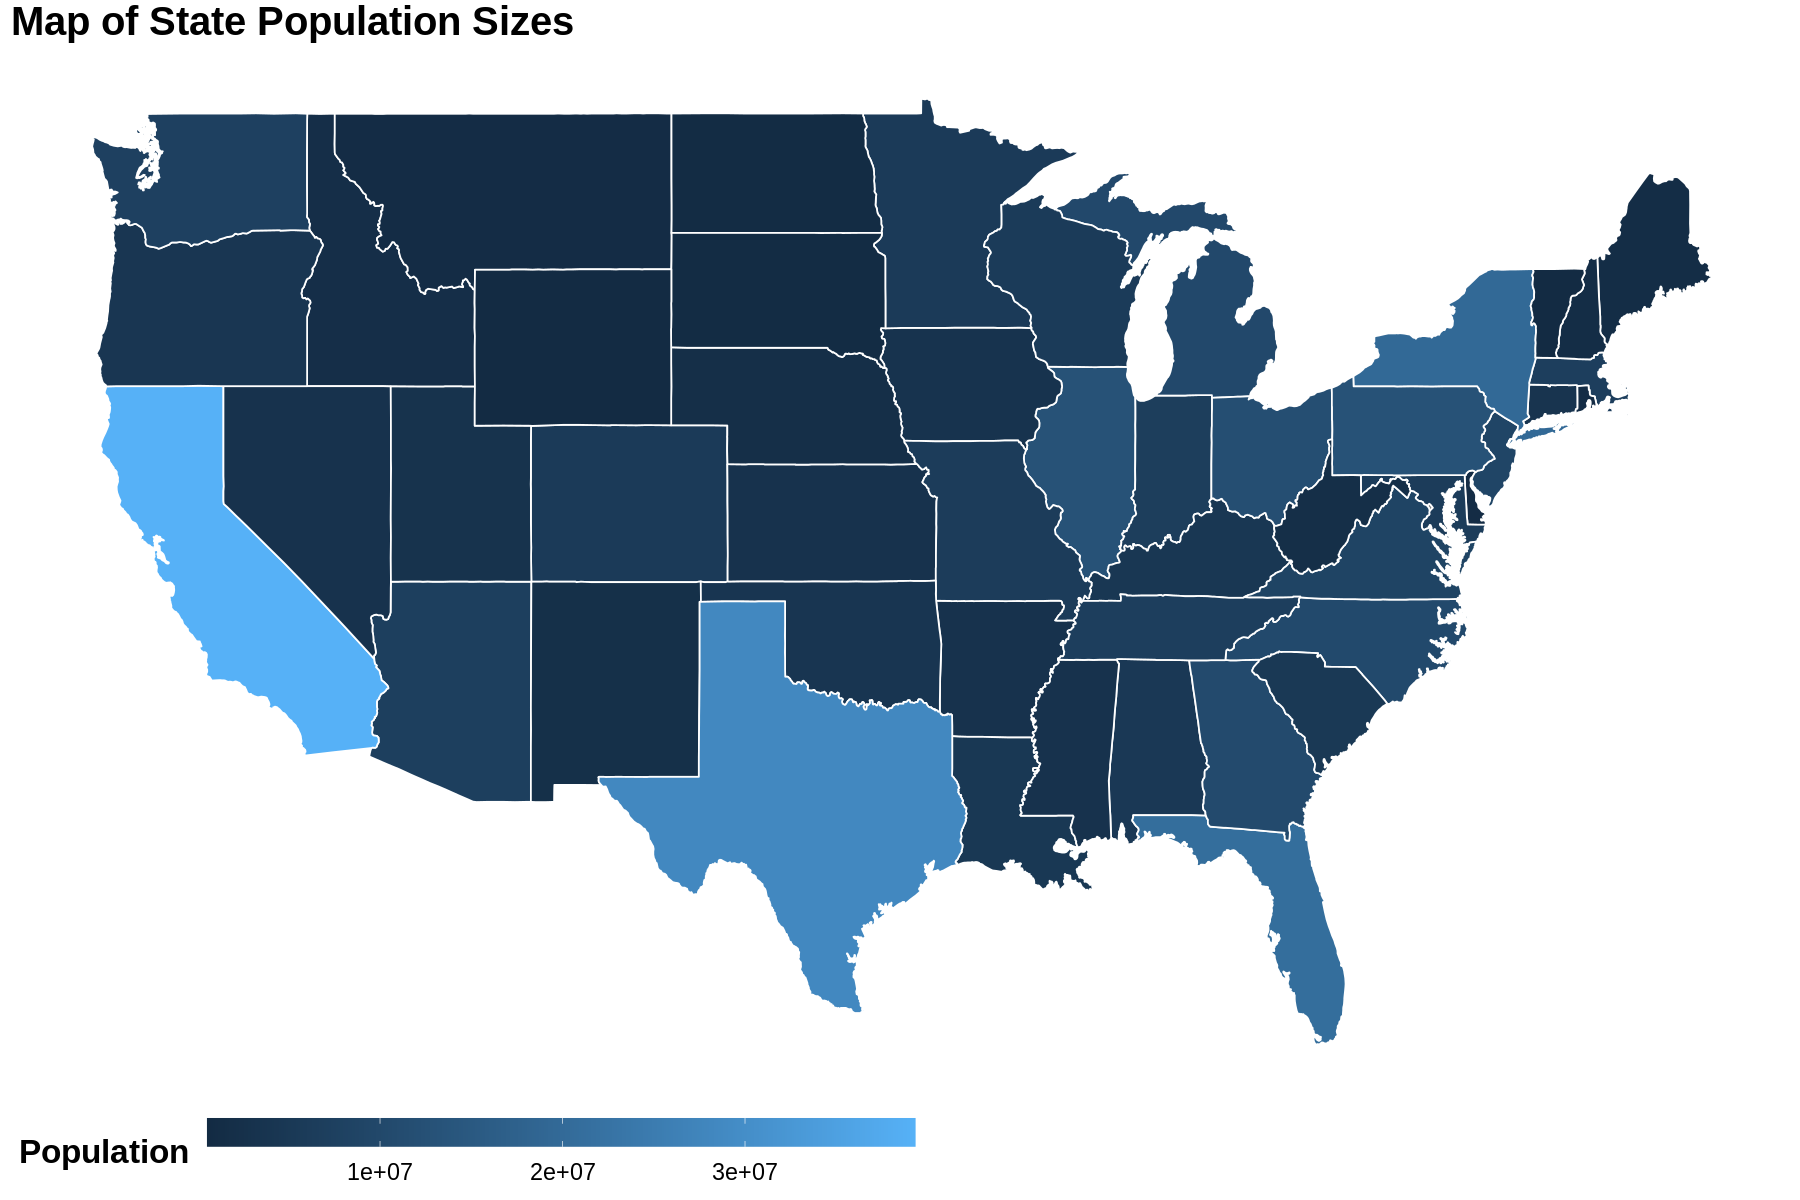

In [26]:
states_df2 %>%
    ggplot() +
    geom_polygon(
        aes(
            x = long, y = lat, 
            group = group, 
            fill = estimate
            ),
        color = "white"
        ) +
    ggthemes::theme_map() +
    theme(
        legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.key.width = unit(3, 'cm'),
        title = element_text(size = 20, face = "bold")
        ) +
    labs(
        title = "Map of State Population Sizes",
        fill = "Population")

Note that we have set a white background using `theme_map()` from the `{ggthemes}` package. I have also expanded the fonts and stretched the map legend for readability. 

What about working with counties instead of states? Sure, let us draw a similar map for all counties. 

In [27]:
load("data/counties.RData")

head(counties)

GEOID,NAME,variable,estimate,moe
<chr>,<chr>,<chr>,<dbl>,<dbl>
01001,"Autauga County, Alabama",B01001_001,55380,NA
01003,"Baldwin County, Alabama",B01001_001,212830,NA
01005,"Barbour County, Alabama",B01001_001,25361,NA
01007,"Bibb County, Alabama",B01001_001,22493,NA
01009,"Blount County, Alabama",B01001_001,57681,NA
01011,"Bullock County, Alabama",B01001_001,10248,NA


Here things are a little more complicated. How so? Well, look at `NAME` ... it includes the county name, followed by the word "County", and then the statename in titlecase. but out `counties_df` file looks different.

In [28]:
head(counties_df)

,long,lat,group,order,region,subregion
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>
1,-86.50517,32.34920,1,1,alabama,autauga
2,-86.53382,32.35493,1,2,alabama,autauga
3,-86.54527,32.36639,1,3,alabama,autauga
4,-86.55673,32.37785,1,4,alabama,autauga
5,-86.57966,32.38357,1,5,alabama,autauga
6,-86.59111,32.37785,1,6,alabama,autauga


Let me create a new column called `countyname` that will combine `subregion` and `region`, both in titlecase. 

In [29]:
counties_df %>%
    mutate(
        state = stringr::str_to_title(region),
        county = stringr::str_to_title(subregion)
    ) %>%
    unite(
        "countyname",
        c("county", "state"),
        sep = ", ",
        remove = FALSE
        ) -> counties_df

In [30]:
head(counties_df)

,long,lat,group,order,region,subregion,countyname,state,county
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,-86.50517,32.34920,1,1,alabama,autauga,"Autauga, Alabama",Alabama,Autauga
2,-86.53382,32.35493,1,2,alabama,autauga,"Autauga, Alabama",Alabama,Autauga
3,-86.54527,32.36639,1,3,alabama,autauga,"Autauga, Alabama",Alabama,Autauga
4,-86.55673,32.37785,1,4,alabama,autauga,"Autauga, Alabama",Alabama,Autauga
5,-86.57966,32.38357,1,5,alabama,autauga,"Autauga, Alabama",Alabama,Autauga
6,-86.59111,32.37785,1,6,alabama,autauga,"Autauga, Alabama",Alabama,Autauga


Progress! But I also see the string "County" showing up in the `counties` file we loaded. Well, I will get rid of that, and the word "Parish" as well (since it gets used in Louisiana).

In [35]:
counties %>%
    mutate(
        countyname = stringr::str_remove_all(NAME, " County| Parish")
        ) -> counties

head(counties)

GEOID,NAME,variable,estimate,moe,countyname
<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
01001,"Autauga County, Alabama",B01001_001,55380,NA,"Autauga, Alabama"
01003,"Baldwin County, Alabama",B01001_001,212830,NA,"Baldwin, Alabama"
01005,"Barbour County, Alabama",B01001_001,25361,NA,"Barbour, Alabama"
01007,"Bibb County, Alabama",B01001_001,22493,NA,"Bibb, Alabama"
01009,"Blount County, Alabama",B01001_001,57681,NA,"Blount, Alabama"
01011,"Bullock County, Alabama",B01001_001,10248,NA,"Bullock, Alabama"


Now we should be able to merge with ease. 

In [36]:
counties_df %>%
    left_join(
        counties,
        by = "countyname"
        ) -> counties_df2

head(counties_df2)

,long,lat,group,order,region,subregion,countyname,state,county,GEOID,NAME,variable,estimate,moe
,<dbl>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,-86.50517,32.34920,1,1,alabama,autauga,"Autauga, Alabama",Alabama,Autauga,01001,"Autauga County, Alabama",B01001_001,55380,NA
2,-86.53382,32.35493,1,2,alabama,autauga,"Autauga, Alabama",Alabama,Autauga,01001,"Autauga County, Alabama",B01001_001,55380,NA
3,-86.54527,32.36639,1,3,alabama,autauga,"Autauga, Alabama",Alabama,Autauga,01001,"Autauga County, Alabama",B01001_001,55380,NA
4,-86.55673,32.37785,1,4,alabama,autauga,"Autauga, Alabama",Alabama,Autauga,01001,"Autauga County, Alabama",B01001_001,55380,NA
5,-86.57966,32.38357,1,5,alabama,autauga,"Autauga, Alabama",Alabama,Autauga,01001,"Autauga County, Alabama",B01001_001,55380,NA
6,-86.59111,32.37785,1,6,alabama,autauga,"Autauga, Alabama",Alabama,Autauga,01001,"Autauga County, Alabama",B01001_001,55380,NA


In [ ]:
counties_df2 %>%
    ggplot() +
    geom_polygon(
        aes(
            x = long, y = lat,
            group = group,
            fill = estimate
            ),
            color = "white"
        ) +
    ggthemes::theme_map() +
    theme(
        legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.key.width = unit(3, 'cm'),
        title = element_text(size = 20, face = "bold")
        ) +
    labs(
        title = "Map of County Population Sizes",
        fill = "Population")

Maybe you are only interested in Florida?

In [ ]:
counties_df2 %>%
  filter(state == "Florida") -> florida

In [ ]:
florida %>%
  ggplot() +
  geom_polygon(
    aes(
      x = long, y = lat,
      group = group,
      fill = estimate
      ),
      color = "white"
      ) +
  ggthemes::theme_map() +
  theme(
      legend.position = "bottom",
      legend.text = element_text(size = 14),
      legend.key.width = unit(3, 'cm'),
      title = element_text(size = 20, face = "bold")
  ) +
  labs(
    title = "Population Size in Floria Counties",
    fill = "Population Size"
        ) +
  scale_fill_viridis_c(option = "plasma")

So far so good but what if we want to fill with some variable that is not in the states or the counties file? This is often the case because you will invariably get the measure you want to map from some other source. For example, what if we want to work with the County Health Rankings file? 

In [ ]:
readxl::read_excel(
    "data/CountyHealthRankings2017.xlsx"
    ) -> chr

In [ ]:
head(chr)

Say I want to map Premature death. How would I do that? Well. I will have to find a way to join this `chr` file to the `states` file. 

In `chr` the state column has two-letter codes, but `states` has no such column, and the state names are fully spelled out! 

In [ ]:
head(states_df)

We are in luck. R has various small built-in data, one of which is `state.name` and the other is `state.abb`. If we join these two, we should be able to build a bridge that lets us get where we need to.

In [ ]:
state.abb

In [ ]:
state.name

Now we combine these two files into a single data-se we will call `state_file`

In [ ]:
bind_cols(
    state.abb, state.name
    ) -> state_file

colnames(state_file) = c("state", "NAME")

In [ ]:
state_file

I will start with char, and `left_join()` `state_file`

In [ ]:
chr %>%
    left_join(
        state_file,
        by = "state"
    ) -> chr_df

In [ ]:
chr_df %>%
    head()

Now we can join the `states` file and map!

In [ ]:
states_df %>% 
    left_join(
        chr_df,
        by = "NAME"
        ) -> chr_states

In [ ]:
head(chr_states)

In [ ]:
chr_states %>%
    ggplot() +
    geom_polygon(
        aes(
            x = long, y = lat,
            group = group,
            fill = Premature_death
            ),
            color = "white"
        ) +
    ggthemes::theme_map() +
    theme(
        legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.key.width = unit(3, 'cm'),
        title = element_text(size = 20, face = "bold")
        ) +
    labs(
        title = "Premature Death in the 50 States",
        fill = "Premature Death Rate"
        ) 

Note the use of `geom_sf_text()` to add the state abbreviations, and I asked for these to be rendered in white rather than the default black font-color. 

You could have also filled by creating quartiles, etc., using `{santoku}`, so do not forget that option. 

For example, here is the same premature death mapped but instead with the states lumped into quartiles of premature death. 

In [ ]:
install.packages("santoku")

In [ ]:
library(santoku)

In [ ]:
chr_states %>%
    mutate(
        pd_quartiles = chop_equally(Premature_death, groups = 4)
        ) %>% 
    ggplot() +
    geom_polygon(
        aes(
            x = long, y = lat,
            group = group,
            fill = pd_quartiles
        ),
            color = "white"
        ) +
    ggthemes::theme_map() +
    theme(
        legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.key.width = unit(3, 'cm'),
        title = element_text(size = 20, face = "bold")
        ) +
    labs(
        title = "Premature Death in the 50 States",
        fill = "Premature Death Quartiles"
        ) 